In [3]:
%load_ext autoreload
%autoreload

import sys
sys.path.insert(0, '..')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:

from microhar.datasets import pamap2
data_path = '../pamap2.parquet'
data = pamap2.load_packed(data_path)

data.head(5)

activity  heartrate  hand_temperature  \
subject    time                                                             
subject105 0 days 00:00:05.700000  transient        NaN              34.0   
           0 days 00:00:05.710000  transient        NaN              34.0   
           0 days 00:00:05.720000  transient        NaN              34.0   
           0 days 00:00:05.730000  transient        NaN              34.0   
           0 days 00:00:05.740000  transient        NaN              34.0   

                                   hand_acceleration_16g_x  \
subject    time                                              
subject105 0 days 00:00:05.700000                  2.22755   
           0 days 00:00:05.710000                  2.37550   
           0 days 00:00:05.720000                  2.94208   
           0 days 00:00:05.730000                  3.47541   
           0 days 00:00:05.740000                  3.54617   

                                   hand_acceleration_16g_y  \
subject    time                                              
subject105 0 days 00:00:05.700000                  9.65418   
           0 days 00:00:05.710000                  9.57647   
           0 days 00:00:05.720000                  9.53415   
           0 days 00:00:05.730000                  9.75837   
           0 days 00:00:05.740000                  9.83232   

                                   hand_acceleration_16g_z  \
subject    time                                              
subject105 0 days 00:00:05.700000                  2.38862   
           0 days 00:00:05.710000                  2.31412   
           0 days 00:00:05.720000                  2.32275   
           0 days 00:00:05.730000                  2.40696   
           0 days 00:00:05.740000                  2.25382   

                                   hand_acceleration_6g_x  \
subject    time                                             
subject105 0 days 00:00:05.700000                 2.31968   
           0 days 00:00:05.710000                 2.45657   
           0 days 00:00:05.720000                 2.78876   
           0 days 00:00:05.730000                 3.33080   
           0 days 00:00:05.740000                 3.67642   

                                   hand_acceleration_6g_y  \
subject    time                                             
subject105 0 days 00:00:05.700000                 9.60752   
           0 days 00:00:05.710000                 9.62177   
           0 days 00:00:05.720000                 9.64961   
           0 days 00:00:05.730000                 9.66073   
           0 days 00:00:05.740000                 9.71848   

                                   hand_acceleration_6g_z  hand_gyro_x  ...  \
subject    time                                                         ...   
subject105 0 days 00:00:05.700000                 2.58278     0.016271  ...   
           0 days 00:00:05.710000                 2.71852    -0.103958  ...   
           0 days 00:00:05.720000                 2.76342    -0.049460  ...   
           0 days 00:00:05.730000                 2.68734     0.012200  ...   
           0 days 00:00:05.740000                 2.50565     0.051629  ...   

                                   ankle_chest_hand_acceleration_16g_z  \
subject    time                                                          
subject105 0 days 00:00:05.700000                             -2.68324   
           0 days 00:00:05.710000                             -2.71992   
           0 days 00:00:05.720000                             -2.95354   
           0 days 00:00:05.730000                             -2.83541   
           0 days 00:00:05.740000                             -2.83511   

                                   ankle_chest_hand_acceleration_6g_x  \
subject    time                                                         
subject105 0 days 00:00:05.700000                             9.09450   
           0 days 00:00:05.710000          

In [24]:
data.reset_index()['subject'].value_counts()

subject102    447000
subject108    408031
subject101    376417
subject105    374783
subject106    361817
subject104    329576
subject107    313599
subject103    252833
subject109      8477
Name: subject, dtype: int64

In [28]:

def prepare_dataset(raw, prefix='hand_acceleration_16g_', out='acc_'):
    df = raw

    # Pick only the data of interest
    columns = {
        f'{prefix}x': f'{out}x',
        f'{prefix}y': f'{out}y',
        f'{prefix}z': f'{out}z',
        'activity': 'activity',
    }
    
    df = df[list(columns.keys())].rename(columns=columns)

    # Remove subject with very little data
    df = df.query("subject != 'subject109'")
    
    return df

dataset = prepare_dataset(data)
dataset


acc_x    acc_y     acc_z   activity
subject    time                                                         
subject105 0 days 00:00:05.700000  2.22755  9.65418  2.388620  transient
           0 days 00:00:05.710000  2.37550  9.57647  2.314120  transient
           0 days 00:00:05.720000  2.94208  9.53415  2.322750  transient
           0 days 00:00:05.730000  3.47541  9.75837  2.406960  transient
           0 days 00:00:05.740000  3.54617  9.83232  2.253820  transient
...                                    ...      ...       ...        ...
subject103 0 days 00:42:13.920000  1.41225  7.77957 -0.041973  transient
           0 days 00:42:13.930000  1.66233  7.62242 -0.422570  transient
           0 days 00:42:13.940000  1.87676  8.14779 -0.882979  transient
           0 days 00:42:13.950000  1.98797  8.79021 -1.075920  transient
           0 days 00:42:13.960000  2.01215  7.61246 -1.225530  transient

[2864056 rows x 4 columns]

In [ ]:

# Compute windows and features

window_length = 
window_hop = 1


In [ ]:

# We use cross-validation with one subject left out test data, and rely on the micro 𝐹1 score as the measure of classification accuracy. The approach works as follows: the nine human subjects in the dataset are processed iteratively. In each iteration, we train the selected classifier on eight subjects and use the single subject left out as a test data to obtain a test 𝐹1 score. Finally, we report a single number: the mean of the test 𝐹1 scores.

import sklearn.metrics

f1_micro = sklearn.metrics.make_scorer(sklearn.metrics.f1_score, average='micro')


sklearn.model_selection.LeaveOneGroupOut



/tmp/ipykernel_37473/2452889056.py:13: UserWarning: The palette list has more values (8) than needed (1), which may not be intended.
  ax = seaborn.lineplot(data=results,


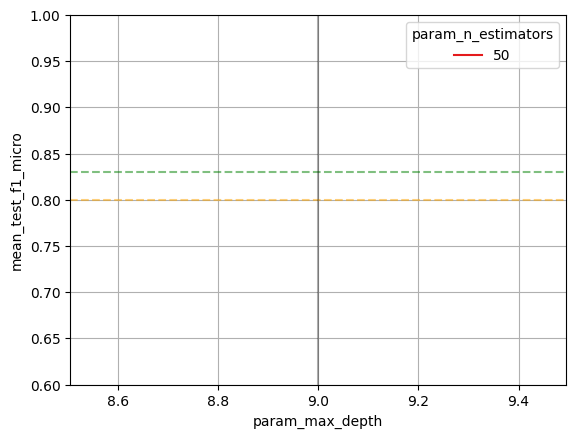

In [124]:

import pandas
import seaborn
p = '../feature-on-board-activities/hyperparam_results.parquet'

results = pandas.read_parquet(p)
results

# TODO: plot the uncertainty
# TODO: multiple sets of n_estimators as different lines/hues

def plot_results_performance(results, x='param_max_depth', y='mean_test_f1_micro'):

    ax = seaborn.lineplot(data=results,
        x=x,
        y=y,
        hue='param_n_estimators',
        palette=seaborn.color_palette("Set1", 8)
    )
    ax.set_ylim(0.60, 1.00)
    ax.axhline(0.80, ls='--', color='orange', alpha=0.5)
    ax.axhline(0.83, ls='--', color='green', alpha=0.5)
    ax.axvline(9, ls='-', color='black', alpha=0.3)
    ax.grid(True)

plot_results_performance(results)

/tmp/ipykernel_37473/3133831545.py:3: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  ax = seaborn.scatterplot(data=results,


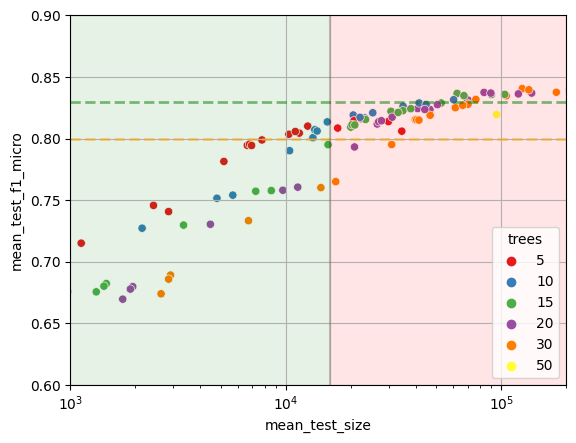

In [128]:

def plot_results_size(results, x='mean_test_size', y='mean_test_f1_micro', hue='trees'):

    ax = seaborn.scatterplot(data=results,
        x=x,
        y=y,
        hue=hue,
        palette=seaborn.color_palette("Set1", 8)
    )
    y_min = 0.60
    y_max = 0.90
    size_min = 1000
    size_target = 16*1000
    size_max = 200*1000
    
    ax.set_ylim(y_min, y_max)
    ax.axhline(0.80, ls='--', color='orange', alpha=0.5, lw=2.0)
    ax.axhline(0.83, ls='--', color='green', alpha=0.5, lw=2.0)
    ax.axvline(size_target, ls='-', color='black', alpha=0.2, lw=1.5)
    ax.axvspan(0, size_target, color='green', alpha=0.1)
    ax.axvspan(size_target, size_max, color='red', alpha=0.1)
    ax.grid(True)
    ax.set_xscale('log')

    ax.set_xlim(size_min, size_max)
    return ax


import os.path
dir = '../feature-on-board-activities/'
ref_results = pandas.read_parquet(os.path.join(dir, 'hyperparam_results.parquet.ref'))
tuned_results = pandas.read_parquet(os.path.join(dir, 'hyperparam_results.parquet.maxdepth2'))
results = pandas.concat([ref_results, tuned_results])

r = results.rename(columns={'param_n_estimators': 'trees'})
ax = plot_results_size(r)
ax.figure.savefig('pamap2-rf-sizeoptimized.png')
